### Implements algorithm 1 in the parti-game [paper](https://link.springer.com/content/pdf/10.1007/BF00993591.pdf)

Learn a controller from a start region to a goal region on a continuous space; Four increasingly effective algorithms to partition discrete state spaces. Algorithm 1 and 2 are non-learning; 3 and 4 learn, hence explore, the world while planning a route to the goal. Here, I implement algorithm 1

In [1]:
import sys
import numpy as np
from os.path import abspath, join
sys.path.append(abspath(join('..')))
sys.path.append(abspath(join('..', 'grids')))
sys.path.append(abspath(join('..', 'utils')))
sys.path.append(abspath(join('..', 'Visualization')))
sys.path.append(abspath(join('..')))

from grids import *
import matplotlib.pyplot as plt
from gen_utils import *
from BoundaryCondition import *
from Visualization import Visualizer
from valFuncs import proj
%matplotlib inline

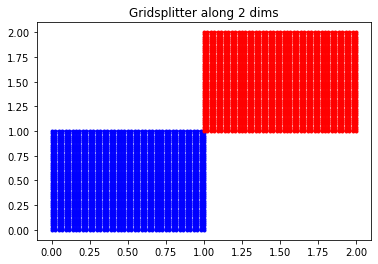

In [2]:
gs = sepGridTest()
   
# Visualize
viz = Visualizer()

viz.visGrid(gs, dim= len(gs))



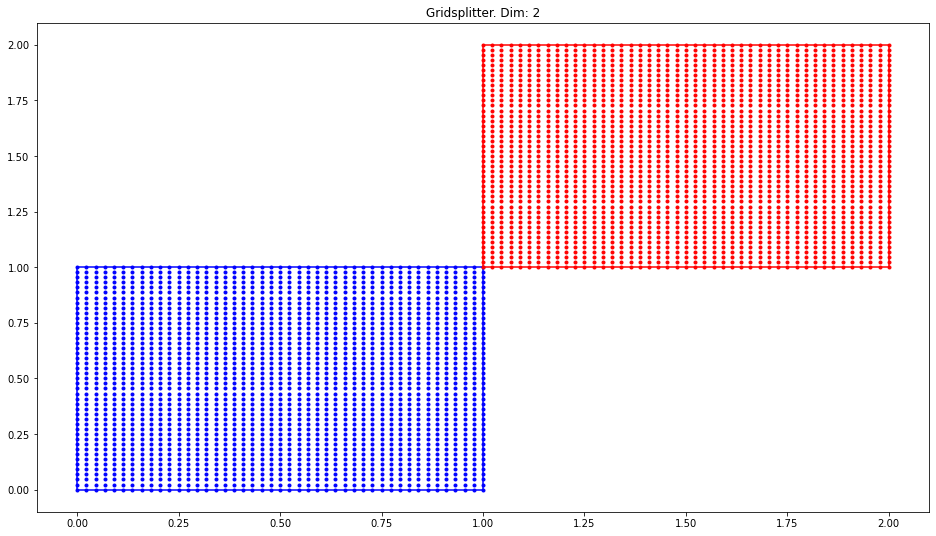

In [3]:

fig = plt.figure(figsize=(16, 9))

colors = ['blue', 'red', 'yellow', 'orange', 'green', 'black']
ax = fig.add_subplot(1, 1, 1)
for i in range(len(gs)):
    g = gs[i]
    ax.plot(g.xs[0], g.xs[1], '.', color=colors[i])
    ax.plot(np.hstack([g.min[0], g.min[0]]), np.hstack([g.min[1], g.max[1]]), linestyle='-', color=colors[i])
    ax.plot(np.hstack([g.max[0], g.max[0]]), np.hstack([g.min[1], g.max[1]]), linestyle='-', color=colors[i])
    ax.plot(np.hstack([g.min[0], g.max[0]]), np.hstack([g.min[1], g.min[1]]), linestyle='-', color=colors[i])
    ax.plot(np.hstack([g.min[0], g.max[0]]), np.hstack([g.max[1], g.max[1]]), linestyle='-', color=colors[i])
plt.title(f'Gridsplitter. Dim: {len(gs)}')
plt.show()

In [2]:
from math import pi

grid_min = expand(np.array((-5, -5, -pi)), ax = 1); # Lower corner of computation domain
grid_max = expand(np.array((5, 5, pi)), ax = 1);   # Upper corner of computation domain
N = expand(np.array((41, 41,  41)), ax = 1);        # Number of grid points per dimension
pdDims = 3;               # 3rd dimension is periodic
g = createGrid(grid_min, grid_max, N, pdDims);

<Figure size 2160x1296 with 0 Axes>

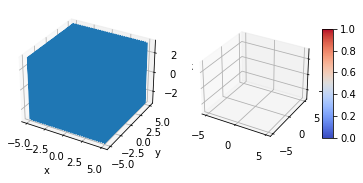

In [3]:
viz = Visualizer(winsize=(30, 18), fontdict={'fontsize':12, 'fontweight':'bold'})
viz.visGrid(g, dim=pdDims)

In [17]:
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = 45*ones(4,1).astype(np.int64)

g = createGrid(gridIn, gridOut, N);

In [18]:
g.xs[0].shape, len(g.xs)

((45, 1), 4)